# Regression Trees and Model Optimization - Lab

## Introduction

In this final lab, we shall see how to apply regression analysis using CART trees for regression, with some hyper parameter tuning as we saw in the case of classification. For a comparison of predictive capabilities and computational cost, we shall work the "Boston Housing" dataset. This will allow us to compare different regression approaches in terms of their accuracy and cost involved. 

## Objectives
You will be able to:
- Apply predictive regression analysis with CART trees
- Get the data ready for modeling
- Tune the key hyper parameters based a various models developed during training 
- Study the impact of tree pruning on the quality of predictions

## Boston Housing Dataset - Again ! 

The dataset is available in the repo as `boston.csv`. 

- Load the Dataset and print its head and dimensions

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
df = pd.read_csv('boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Identify Features and Target Data
In this lab, we shall use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point:

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Target
- `MEDV`' has been multiplicatively scaled to account for 35 years of market inflation.


- Create dataframes for features and target as shown above. 
- Inspect the contents for validity 

In [8]:
# Your code here 
X = df[['rm', 'lstat', 'ptratio']]
y = df.medv
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

## Inspect Correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

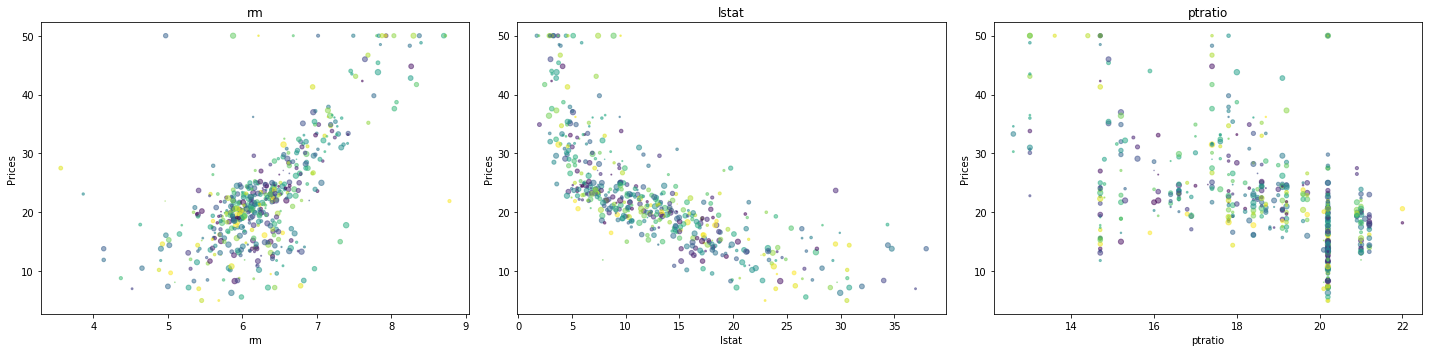

In [24]:
# Your code here 

N = len(X)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1  # 0 to 15 point radii

plt.figure(figsize=(20, 5))
for i, col in enumerate(X.columns):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[col], y, s= area, c=colors, alpha=0.5)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

In [25]:
# Your observations here 

# A positive relation for 'rm' and a negative relation for 'lstat' - Explain what positive and negative means
# ptratio has a high variance and is not explaining the target well
# 2 out of these three look like good predictors

## Create Evaluation Metrics

- Create a function `performance(true, predicted)` to calculate and return the r-sqaured score and MSE for two equal sized arrays showing true and predicted values
- TEst the function with given data 

In [26]:
# Evaluation Metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    r2 = r2_score(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    return [r2, mse] 


# Calculate the performance - TEST
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

[0.9228556485355649, 0.4719999999999998]

## Supervised Training 
- For supervised learning, split the `features` and `target` datasets into training/test data (80/20). 
- For reproducibility, use `random_state=42`

In [27]:
# Your code here 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = .20)

## Grow a Vanilla Regression Tree

- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above.
- Use `random_state=45` for tree instance
- Record your observations

In [28]:
# Your code here 
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=45)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

performance(y_test, y_pred)


# (0.4712438851035674, 38.7756862745098)  - R2, MSE

[0.6819635312656342, 33.26049019607843]

In [25]:
# Your observations here 

# The vanilla model shows very low value for r-squared , and MSE is high compared to the the mean of output variable
# Mainly because of overfitting, the tree is grown very deep to minimize the observations in leafs
# Needs some tuning 

## Hyperparameter Tuning 

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a for loop for each depth value. 
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs.
- Comment on the output 

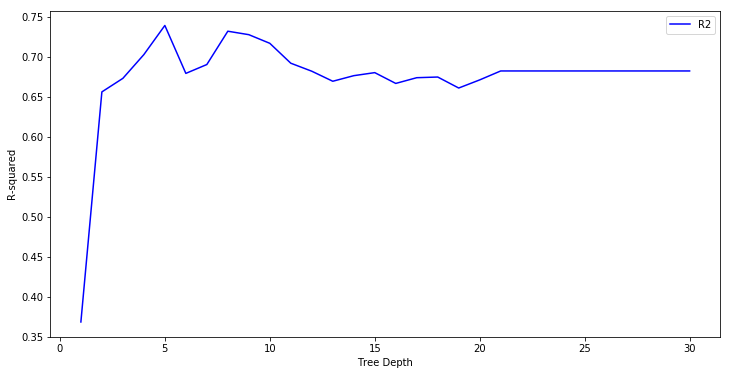

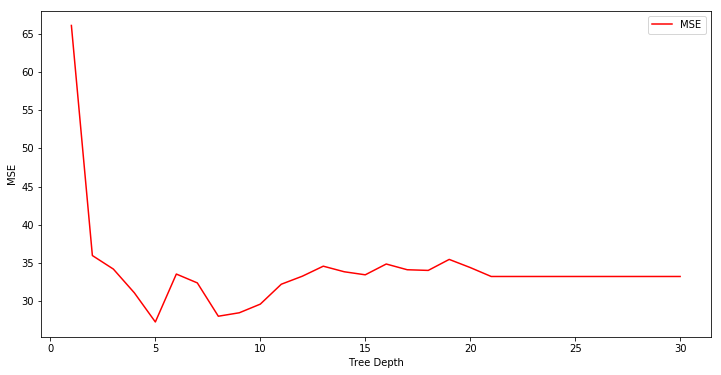

In [30]:
# Your code here 
depths = np.linspace(1, 30, 30, endpoint=True)

r2 = []
mse = []
for depth in depths:
    regressor = DecisionTreeRegressor(random_state=45, max_depth=depth)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score = performance(y_test, y_pred)
    r2.append(score[0])
    mse.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(depths, r2, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(depths, mse, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()  

In [ ]:
# Your observations here 
# mse minimized at 5 and R2 maximized at 5 - optimum depth


## More Hyperparameter Tuning 

- Repeat the above process for `min_samples_split` parameter

- Use a a range of values from 2-10 for this parameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above

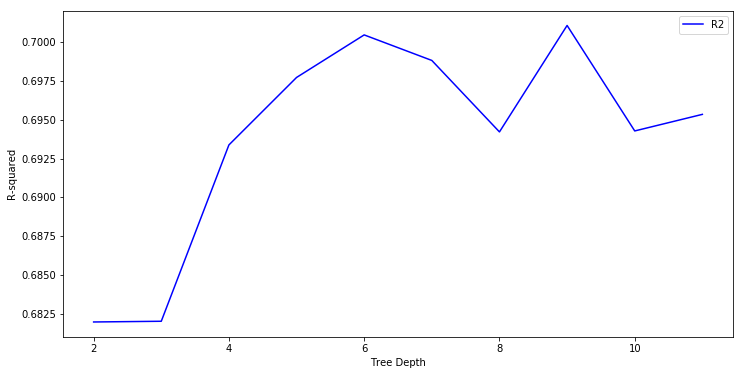

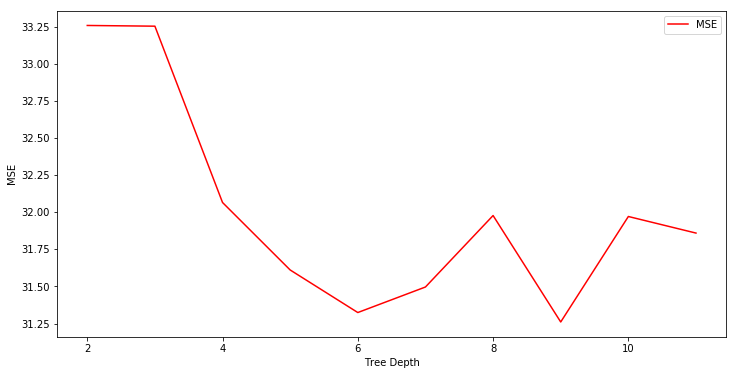

In [38]:
# Your code here 
min_samples = np.arange(2, 12)

r2 = []
mse = []
for split in min_samples:
    regressor = DecisionTreeRegressor(random_state=45, min_samples_split=split)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score = performance(y_test, y_pred)
    r2.append(score[0])
    mse.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(min_samples, r2, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(min_samples, mse, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()  

In [34]:
# Your observations here 
# appears optimized at 6 and 9

# Run the "Optimized" Model 

- Use the best values for max_depth and min_samples_split found in previous runs and run an optimized model with these values. 
- Calculate the performance and comment on the output 

In [46]:
# Your code here 
regressor = DecisionTreeRegressor(random_state=45, min_samples_split=6, max_depth=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

score = performance(y_test, y_pred)
score

[0.7230038296707805, 28.968465296605004]

In [36]:
# Your observation

# slight improvement

## Visualize the tree
- Visualize the trained model as we did in previous sections
- Show the labels for each variable being split in a node
- Interpret the tree

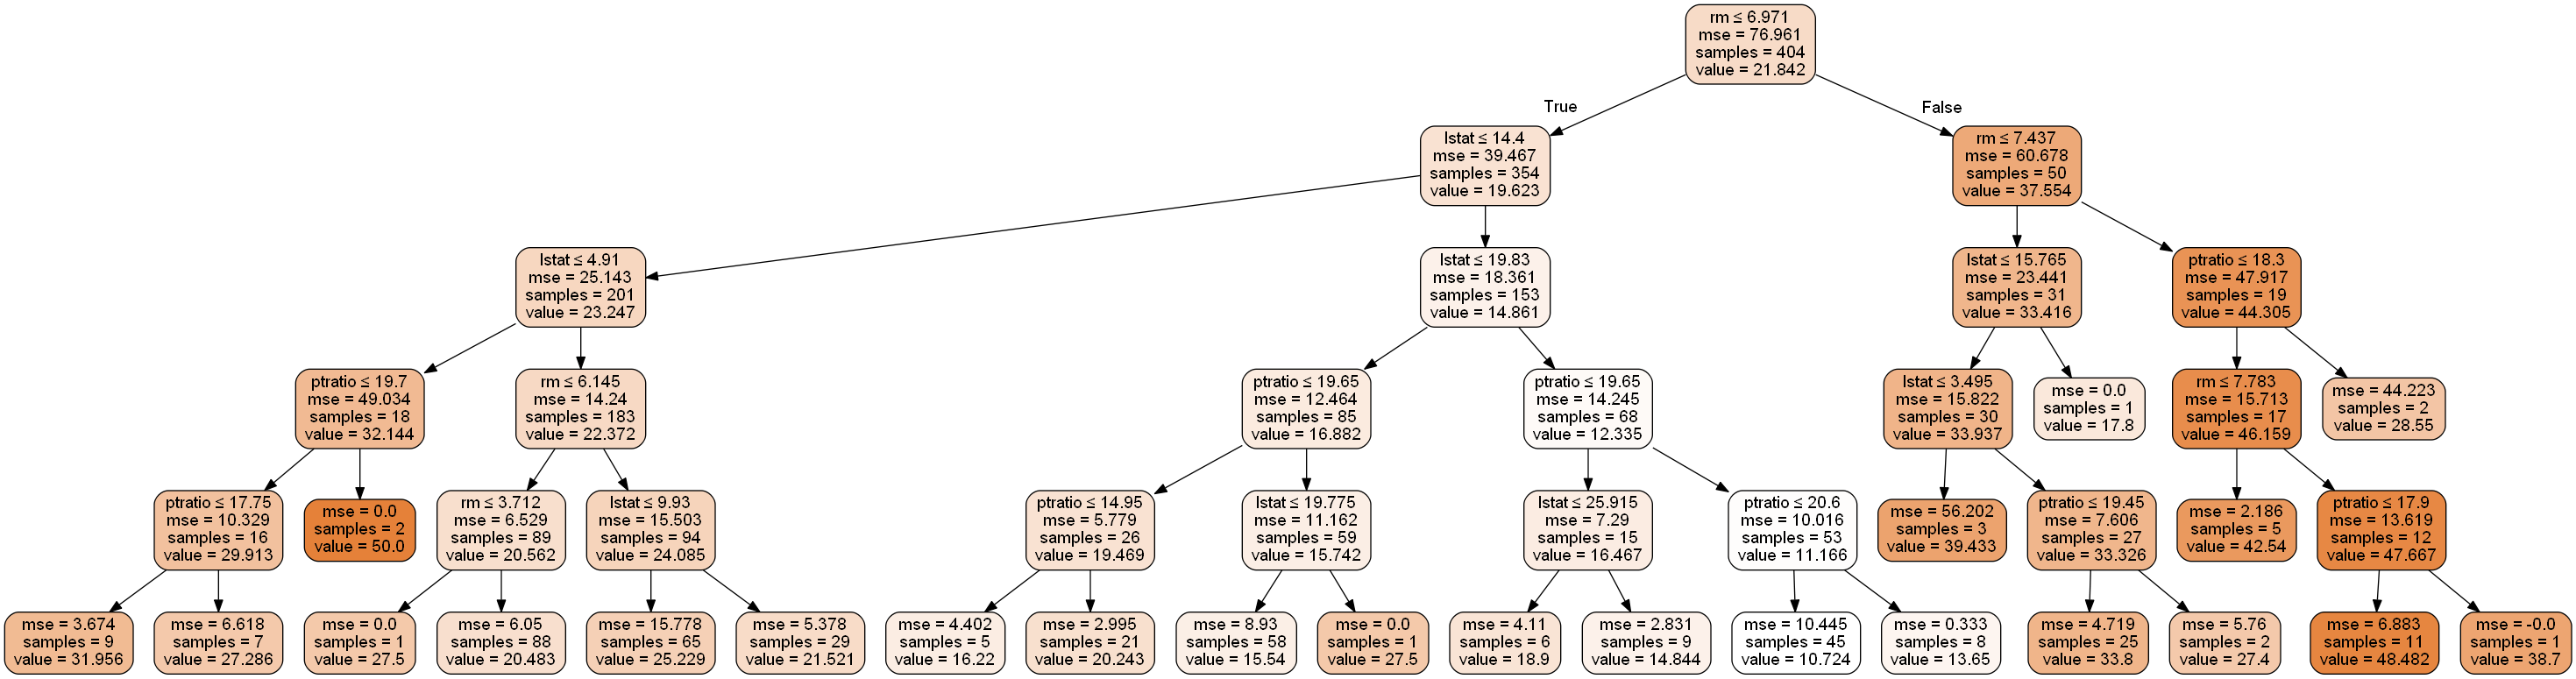

In [49]:
# Your code here 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
#Your observations here 



## Level Up - Optional 

- How about bringing in some more features from the original dataset which may be good predictors
- Also , Tune more more hyper parameters like max-features to find the optimal model 


In [71]:
X = df.iloc[:, 1:-1]

X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


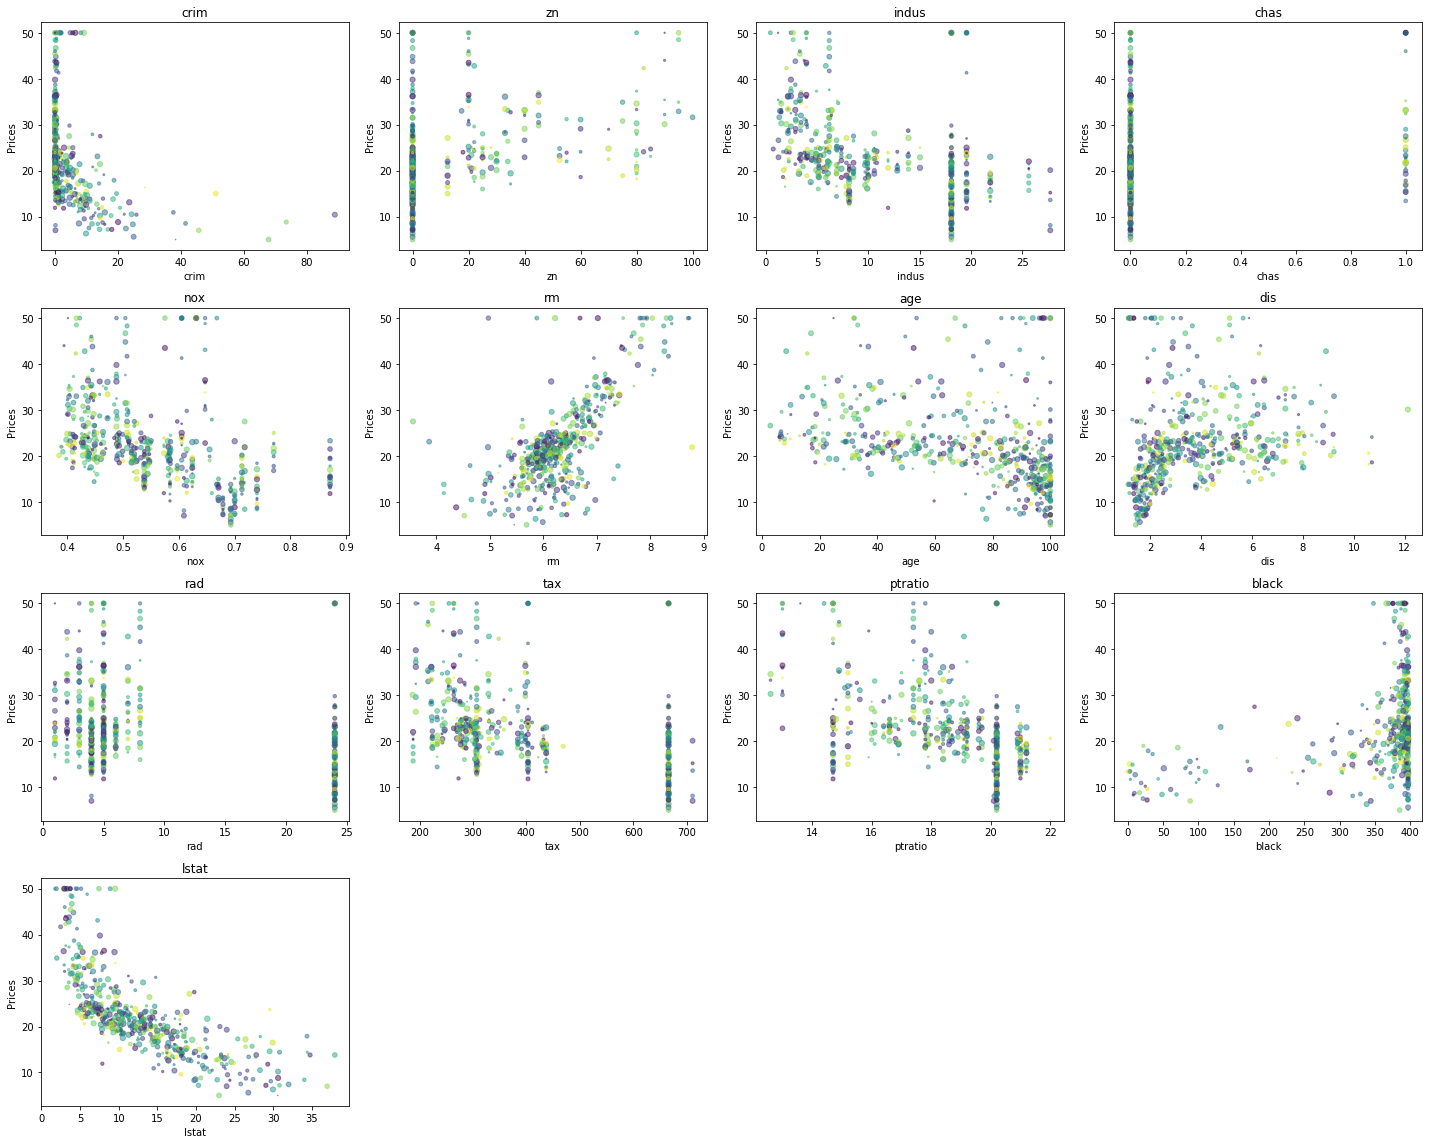

In [72]:
N = len(X)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1  # 0 to 15 point radii

plt.figure(figsize=(20, 16))
for i, col in enumerate(X.columns):
    plt.subplot(4, 4, i+1)
    plt.scatter(X[col], y, s= area, c=colors, alpha=0.5)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

In [78]:
X = df[['rm', 'lstat', 'dis', 'nox']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = .20)

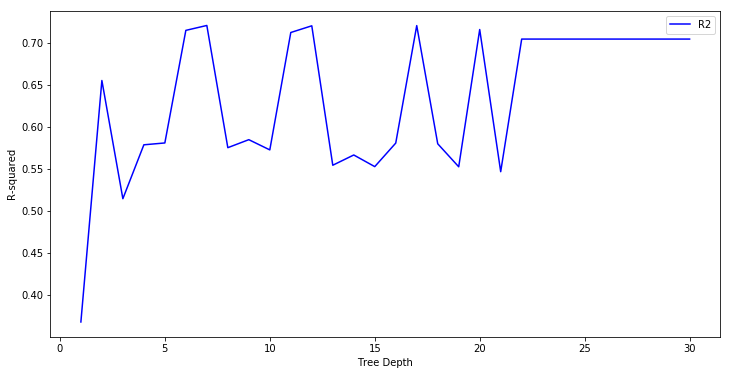

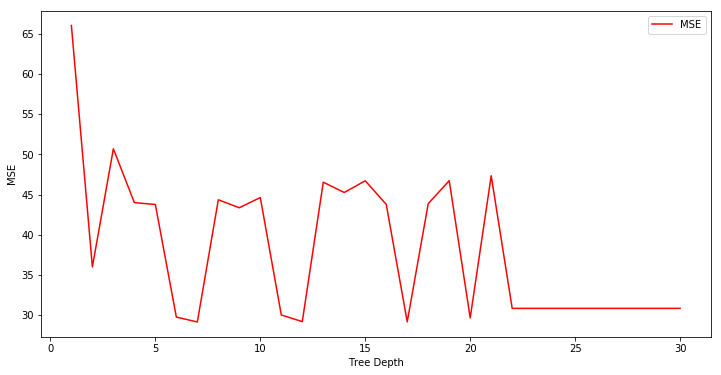

In [79]:
depths = np.linspace(1, 30, 30, endpoint=True)

r2 = []
mse = []
for depth in depths:
    regressor = DecisionTreeRegressor(random_state=45, max_depth=depth)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score = performance(y_test, y_pred)
    r2.append(score[0])
    mse.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(depths, r2, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(depths, mse, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()  

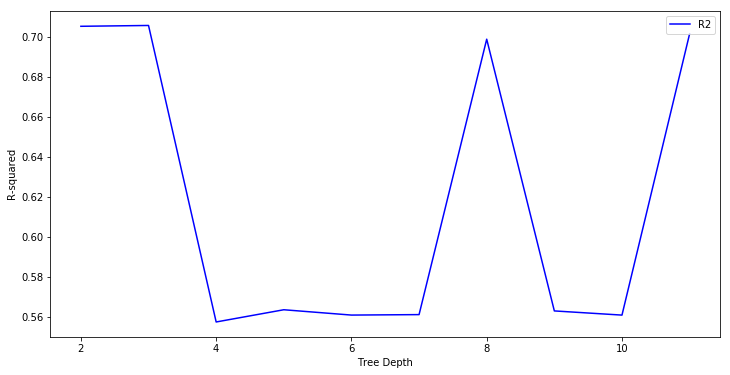

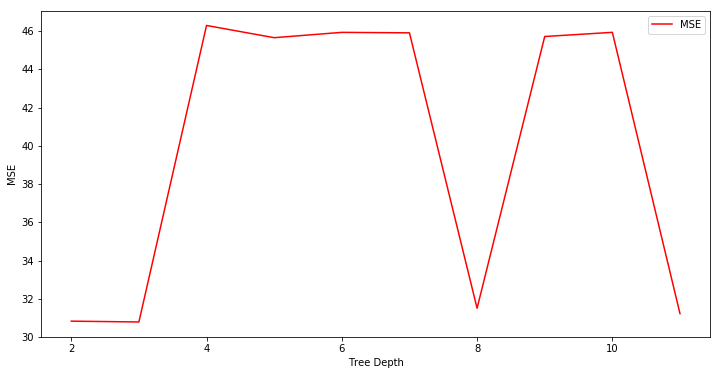

In [80]:
min_samples = np.arange(2, 12)

r2 = []
mse = []
for split in min_samples:
    regressor = DecisionTreeRegressor(random_state=45, min_samples_split=split)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score = performance(y_test, y_pred)
    r2.append(score[0])
    mse.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(min_samples, r2, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(min_samples, mse, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()  

In [85]:
regressor = DecisionTreeRegressor(random_state=45, min_samples_split=3, max_depth=7)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

score = performance(y_test, y_pred)
score

[0.7184954032069282, 29.439959885881006]

In [ ]:
# including more features doesn't seem to imporve predictive accuracy

## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing Dataset. We saw how to train various models to find the optimal values for pruning and limiting the growth of the trees. We also looked at how to extract some rules from visualizing trees , that might be used for decision making later. In the next section we shall look at running "Grid Searches" for identifying the best model while tuning all required hyper-parameters - at once. 